### Predicting House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd

In [12]:
train_df = pd.read_csv('data/train.csv')
print('Loaded %s training rows with %s columns' % (train_df.shape[0], train_df.shape[1]))

Loaded 1460 training rows with 81 columns


In [13]:
test_df = pd.read_csv('data/test.csv')
print('Loaded %s test rows with %s columns' % (test_df.shape[0], test_df.shape[1]))

Loaded 1459 test rows with 80 columns


In [14]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline
import seaborn
seaborn.set()

In [25]:
import matplotlib.dates as mdates
import locale
locale.setlocale(locale.LC_ALL, 'de-CH')
thousand_formatter = plt.FuncFormatter(lambda x, _ : locale.format("%d", x, grouping=True))

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

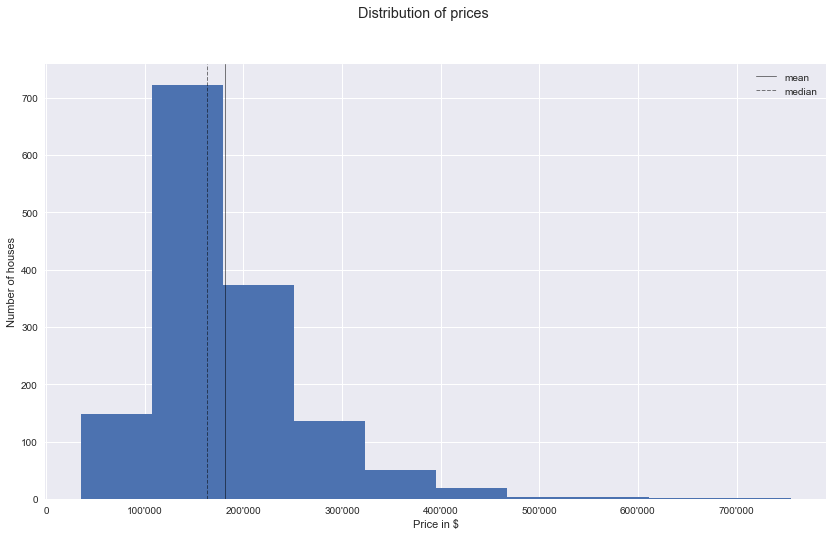

In [45]:
fig, ax = plt.subplots(1, figsize=(14, 8))
fig.suptitle('Distribution of prices')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Price in $')
ax.yaxis.set_major_formatter(thousand_formatter)
ax.xaxis.set_major_formatter(thousand_formatter)
ax.axvline(train_df['SalePrice'].mean(), c='black', linewidth=1, alpha=.5)
ax.axvline(train_df['SalePrice'].median(), c='black', linewidth=1, alpha=.5, linestyle='--')
ax.legend(['mean','median'])
ax.hist(train_df.loc[:, 'SalePrice'])

#### Creating a simple benchmark model with linear regression

In [47]:
train_df.loc[:, ['LotArea','YearBuilt','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].head()

,LotArea,YearBuilt,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,8450,2003,1,0,2,1
1,9600,1976,0,1,2,0
2,11250,2001,1,0,2,1
3,9550,1915,1,0,1,0
4,14260,2000,1,0,2,1


In [59]:
X = train_df.loc[:, ['LotArea','YearBuilt','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']]
y = train_df['SalePrice']

In [98]:
# Do a train/test split on our train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [61]:
from sklearn import linear_model

In [62]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
reg.coef_

array([  1.21432182e+00,   6.64425958e+02,   2.69444822e+04,
         2.67500080e+03,   5.40386237e+04,   2.53425545e+04])

In [64]:
predictions = reg.predict(X_test)

In [67]:
# Calculate r2 of simple linear model
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.51388423803353023

#### Building a pipeline

In [68]:
# We first try a pipeline with a linear regression and k-best

In [113]:
from sklearn.base import TransformerMixin, BaseEstimator

class NoFitMixin:
    def fit(self, X, y=None):
        return self

class DFTransform(BaseEstimator, TransformerMixin, NoFitMixin):
    def __init__(self, func, copy=False):
        self.func = func
        self.copy = copy

    def transform(self, X):
        X_ = X if not self.copy else X.copy()
        return self.func(X_)

In [70]:
from sklearn.pipeline import Pipeline, FeatureUnion, _transform_one
from sklearn.externals.joblib import Parallel, delayed

class DFFeatureUnion(FeatureUnion):
    def fit_transform(self, X, y=None, **fit_params):
        # non-optimized default implementation; override when a better
        # method is possible
        if y is None:
            # fit method of arity 1 (unsupervised transformation)
            return self.fit(X, **fit_params).transform(X)
        else:
            # fit method of arity 2 (supervised transformation)
            return self.fit(X, y, **fit_params).transform(X)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(trans, weight, X)
            for _, trans, weight in self._iter())
        return pd.concat(Xs, axis=1, join='inner')

In [71]:
from sklearn.feature_selection import SelectKBest

In [100]:
pipeline = Pipeline([
    ('univ_select', SelectKBest(k=5)),
    ('lin_reg', linear_model.LinearRegression())
])

In [101]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('univ_select', SelectKBest(k=5, score_func=<function f_classif at 0x00000179C4E41EA0>)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [85]:
predictions = pipeline.predict(X_test)

In [86]:
r2_score(y_test, predictions)

0.51388423803353023

#### Adding grid search to the pipeline

In [217]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [218]:
# Do a train/test split on our train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [219]:
pipeline = Pipeline([
    ('numerical_select', DFTransform(lambda X: X.select_dtypes(exclude=['object']))),
    ('fill_median', DFTransform(lambda X: X.fillna(X.median()))),
    ('univ_select', SelectKBest(k=5)),
    ('lin_reg', linear_model.LinearRegression())
])

In [220]:
import warnings
warnings.filterwarnings('ignore')

In [221]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(univ_select__k=[3, 5, 8, 13],
                  lin_reg__normalize=[True, False])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Pipeline(memory=None,
     steps=[('numerical_select', DFTransform(copy=False, func=<function <lambda> at 0x00000179C605A730>)), ('fill_median', DFTransform(copy=False, func=<function <lambda> at 0x00000179C605A510>)), ('univ_select', SelectKBest(k=8, score_func=<function f_classif at 0x00000179C4E41EA0>)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.0s finished


In [133]:
predictions = grid_search.predict(X_test)
r2_score(y_test, predictions)

0.77146295631678297

In [134]:
grid_search.best_params_

{'lin_reg__normalize': True, 'univ_select__k': 8}

In [135]:
# Interesting! 8 features are better than 13!

#### Building the loss function

$$J(\theta) = \sqrt{\frac{1}{n}\sum_{n=1}^{n}(\log{\hat{y}_n}-\log{y_n})^2}$$

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [140]:
y_h = [2, 4, 7, 9]
y_p = [2, 4.5, 6, 12]

In [141]:
import numpy as np
import math

In [153]:
assert(4 == 4, "foobar")

In [170]:
def rmse_log(y_pred, y_actual):
    assert len(y_pred) == len(y_actual), "The lengths of the list do not match"
    return math.sqrt( 1/len(y_pred) * \
                     np.sum((np.log(y_pred) - np.log(y_actual))**2))

In [169]:
rmse_log(y_h, y_p)

0.17349081415869722

Verifiy this with the sklearn function:

In [171]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_h, y_p)

0.023937417615036153

In [205]:
math.sqrt(mean_squared_log_error(y_h, y_p))

0.15471721822420462

In [172]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.log(y_h), np.log(y_p))

0.030099062597447619

In [206]:
math.sqrt(mean_squared_error(np.log(y_h), np.log(y_p)))

0.17349081415869722

In [203]:
def rmse(y_pred, y_actual):
    assert len(y_pred) == len(y_actual), "The lengths of the list do not match"
    return math.sqrt( 1.0/len(y_pred) * \
                     np.sum((np.asarray(y_pred) - np.asarray(y_actual))**2))

In [204]:
rmse(y_h, y_p)

1.6007810593582121

Taking the root of the exiting sklearn function

In [283]:
from sklearn.metrics import mean_squared_error

def rmse_log(y_actual, y_pred):
    return math.sqrt(mean_squared_error(np.nan_to_num(np.log(y_pred)), np.log(y_actual)))

In [240]:
rmse_log(y_h, y_p)

False


0.17349081415869722

#### Evaluating base model with correct loss function

Building a custom scorer

In [232]:
from sklearn.metrics.scorer import make_scorer

In [278]:
rmse_log_scorer = make_scorer(rmse_log)

In [284]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(univ_select__k=[3, 5, 8, 13],
                  lin_reg__normalize=[True, False])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, cv=8,
                            scoring = rmse_log_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 8 folds for each of 8 candidates, totalling 64 fits
Pipeline(memory=None,
     steps=[('numerical_select', DFTransform(copy=False, func=<function <lambda> at 0x00000179C605A730>)), ('fill_median', DFTransform(copy=False, func=<function <lambda> at 0x00000179C605A510>)), ('univ_select', SelectKBest(k=3, score_func=<function f_classif at 0x00000179C4E41EA0>)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    6.1s finished


In [287]:
predictions = grid_search.predict(X_test)
print('R2-score: %s' % r2_score(y_test, predictions))
print('RMSE (log): %s' % rmse_log(y_test, predictions))

R2-score: 0.682827718574
RMSE (log): 0.5594201631289424


#### Integrate leaderboard of kaggle

In [288]:
leaderboard = pd.read_csv('data/leaderboard.csv')

In [289]:
leaderboard.head()

,TeamId,TeamName,SubmissionDate,Score
0,365763,Paulo Pinto,2016-08-31 18:51:53,9.53944
1,365763,Paulo Pinto,2016-08-31 18:57:26,0.16042
2,365763,Paulo Pinto,2016-08-31 19:12:15,0.12632
3,367116,Russ Boucher,2016-09-04 02:46:17,0.12319
4,367116,Russ Boucher,2016-09-04 15:34:12,0.12241


In [292]:
leaderboard.sort_values('Score', ascending=True).head(10)

,TeamId,TeamName,SubmissionDate,Score
11880,1780632,GroundTruth,2018-06-14 06:59:25,0.00000
3719,1639000,ericbenhamou,2018-05-02 21:55:36,0.00354
336,439244,DSXL,2017-04-18 09:57:55,0.06626
307,439244,DSXL,2017-03-23 13:29:40,0.06627
9994,1752010,chi7moveon,2018-06-04 15:46:07,0.10677
4494,811726,Deargen,2018-05-07 14:03:32,0.10775
5099,365763,Paulo Pinto,2018-05-10 17:12:40,0.10910
5095,365763,Paulo Pinto,2018-05-10 17:05:52,0.10914
10802,1363349,Dmitry Storozhenko,2018-06-09 08:28:21,0.10915
10801,1363349,Dmitry Storozhenko,2018-06-09 08:26:02,0.10916


In [294]:
leaderboard.sort_values('Score', ascending=False).head(10)

,TeamId,TeamName,SubmissionDate,Score
3263,1618024,Cameron Ramirez,2018-04-30 06:19:39,289.94320
3264,1618024,Cameron Ramirez,2018-04-30 06:20:27,289.66311
2965,1507331,Vicky Li,2018-04-24 19:00:22,234.45907
3265,1618024,Cameron Ramirez,2018-04-30 06:21:49,216.77429
7152,1704608,Hamzan Wadi,2018-05-20 10:06:07,25.95873
6080,1665676,Gleb Yeliseev,2018-05-15 11:28:43,16.39963
9734,1636117,kwong8,2018-06-03 09:22:51,15.66668
14345,1770792,Daria Czerniawko,2018-06-27 08:07:19,12.01789
2402,1524378,rerost,2018-04-12 13:56:57,12.01789
14532,1823588,Cihan Demir,2018-06-28 07:36:18,12.01781


In [329]:
#leaderboard.where(leaderboard['TeamName'] != None).where(leaderboard['TeamName'] == 'Paulo Pinto')
leaderboard.loc[(leaderboard['TeamName'].notnull()) & (leaderboard['TeamName'] == 'Paulo Pinto')]

,TeamId,TeamName,SubmissionDate,Score
0,365763,Paulo Pinto,2016-08-31 18:51:53,9.53944
1,365763,Paulo Pinto,2016-08-31 18:57:26,0.16042
2,365763,Paulo Pinto,2016-08-31 19:12:15,0.12632
10,365763,Paulo Pinto,2016-09-06 12:58:34,0.12467
11,365763,Paulo Pinto,2016-09-06 12:59:13,0.12405
96,365763,Paulo Pinto,2016-12-08 18:02:01,0.11590
97,365763,Paulo Pinto,2016-12-08 18:13:43,0.11491
98,365763,Paulo Pinto,2016-12-08 18:15:30,0.11439
99,365763,Paulo Pinto,2016-12-09 00:17:52,0.11284
5092,365763,Paulo Pinto,2018-05-10 17:01:38,0.10985


We see, that even top scorer have high scores (bad results) submitted.

We aim high so we visualize just the first quantile

In [341]:
leaderboard.loc[:, ['Score']].quantile(.25)

Score    0.12643
Name: 0.25, dtype: float64

In [356]:
# We drop the highest 25%
q3 = leaderboard.loc[leaderboard.Score < leaderboard.Score.quantile(.75)]

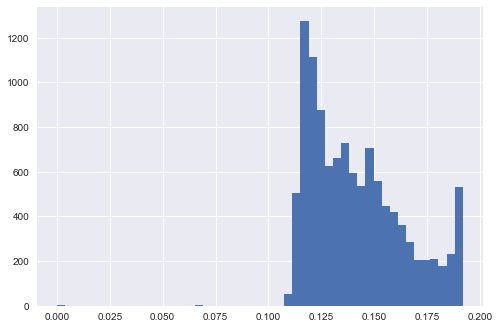

In [357]:
q3['Score'].hist(bins = 50)

#### Making first submission for comparing local results to the kaggle results

In [359]:
# This time we train on the complete set
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [370]:
rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)

In [371]:
pipeline = Pipeline([
    ('numerical_select', DFTransform(lambda X: X.select_dtypes(exclude=['object']))),
    ('fill_median', DFTransform(lambda X: X.fillna(X.median()))),
    ('univ_select', SelectKBest(k=5)),
    ('lin_reg', linear_model.LinearRegression())
])

In [387]:
# We first repeat the process with a train and test set
# Do a train/test split on our train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, cv=8,
                            scoring = rmse_log_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 8 folds for each of 8 candidates, totalling 64 fits
Pipeline(memory=None,
     steps=[('numerical_select', DFTransform(copy=False, func=<function <lambda> at 0x00000179C80FC510>)), ('fill_median', DFTransform(copy=False, func=<function <lambda> at 0x00000179C80FCE18>)), ('univ_select', SelectKBest(k=13, score_func=<function f_classif at 0x00000179C4E41EA0>)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.6s finished


In [388]:
# We just print once again our results if we do not train with all the train data
predictions = grid_search.predict(X_test)
print('R2-score: %s' % r2_score(y_test, predictions))
print('RMSE (log): %s' % rmse_log(y_test, predictions))

R2-score: 0.795016292357
RMSE (log): 0.2003831760232423


In [389]:
# Now we train with all the data we are given
from sklearn.model_selection import GridSearchCV

param_grid = dict(univ_select__k=[3, 5, 8, 13],
                  lin_reg__normalize=[True, False])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, cv=8,
                            scoring = rmse_log_scorer)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 8 folds for each of 8 candidates, totalling 64 fits
Pipeline(memory=None,
     steps=[('numerical_select', DFTransform(copy=False, func=<function <lambda> at 0x00000179C80FC510>)), ('fill_median', DFTransform(copy=False, func=<function <lambda> at 0x00000179C80FCE18>)), ('univ_select', SelectKBest(k=13, score_func=<function f_classif at 0x00000179C4E41EA0>)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    6.5s finished


In [390]:
predictions = grid_search.predict(X)
print('R2-score: %s' % r2_score(y, predictions))
print('RMSE (log): %s' % rmse_log(y, predictions))

R2-score: 0.783659127922
RMSE (log): 0.45672434936486556


In [391]:
# Now we predict the submission set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [392]:
predictions = grid_search.predict(test_df)

In [394]:
predictions[:10]

array([ 109888.68965612,  161926.7981299 ,  168482.27093434,
        185621.79093184,  212814.79635287,  179686.43963561,
        172836.88946434,  172897.81272137,  204947.37852151,
         99821.67182527])

In [398]:
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})

In [400]:
submission.head(10)

,Id,SalePrice
0,1461,109888.689656
1,1462,161926.798130
2,1463,168482.270934
3,1464,185621.790932
4,1465,212814.796353
5,1466,179686.439636
6,1467,172836.889464
7,1468,172897.812721
8,1469,204947.378522
9,1470,99821.671825


In [404]:
# Creating sanity check for the house with index 9 (cheap)
test_df.loc[9, ['LotArea','YearBuilt','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']]

LotArea         8400
YearBuilt       1970
BsmtFullBath       1
BsmtHalfBath       0
FullBath           1
HalfBath           0
Name: 9, dtype: object

In [410]:
import time
timestr = time.strftime("%Y%m%d%H%M%S")

In [418]:
submission.to_csv('submissions/'+pd.datetime.now().strftime("%Y%m%d%H%M%S" + '.csv'), index=False)

In [425]:
import os
os.getcwd()

'C:\\Source\\predicting-house-prices'

In [433]:
def write_submission(df, pred):
    submission = pd.DataFrame({'Id': df.Id, 'SalePrice': pred})
    file_path = os.getcwd() + '\\submissions\\' + pd.datetime.now().strftime("%Y%m%d%H%M%S") + '.csv'
    submission.to_csv(file_path, index=False)
    print('File written to %s' % file_path)

In [435]:
write_submission(test_df, predictions)

File written to C:\Source\predicting-house-prices\submissions\20180708160101.csv


Kaggle: Your submission scored 0.62074

#### Find all NaNs, Nas and Nulls

In [461]:
train_df = pd.read_csv('data/train.csv')

In [475]:
# Which columns do have null values
train_df.columns[train_df.isnull().any(axis=0)]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [476]:
# How many null rows in each column
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [483]:
# Which rows do have null values
train_df[train_df.isnull().any(axis=1)][null_columns].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


#### Find the 2 and 5 most important features

In [459]:
# This time we train on the complete set
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [460]:
# We remove categorical features first
X = X.select_dtypes(exclude=['object'])

In [488]:
# Remove columns with null values
X = X.drop(X.columns[X.isnull().any(axis=0)], axis=1)

In [489]:
# Check result
X.columns[X.isnull().any(axis=0)]

Index([], dtype='object')

In [490]:
sel = SelectKBest(k=2)

In [491]:
sel.fit(X, y)

SelectKBest(k=2, score_func=<function f_classif at 0x00000179C4E41EA0>)

In [497]:
feature_score = pd.DataFrame({'Feature': X.columns, 'Score': sel.scores_})

In [501]:
feature_score.sort_values('Score', ascending=False).head(10)

,Feature,Score
3,OverallQual,5.729183
31,MiscVal,3.756250
14,GrLivArea,3.435110
2,LotArea,3.285852
23,GarageCars,2.861594
17,FullBath,2.678847
24,GarageArea,2.583341
11,1stFlrSF,2.338620
10,TotalBsmtSF,2.315290
5,YearBuilt,2.310198


#### Find the 2 most important features and display a graph with the predictions

In [504]:
feature_score.sort_values('Score', ascending=False).head(2)['Feature']

3     OverallQual
31        MiscVal
Name: Feature, dtype: object

In [502]:
# This time we train on the complete set
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

<IPython.core.display.Javascript object>


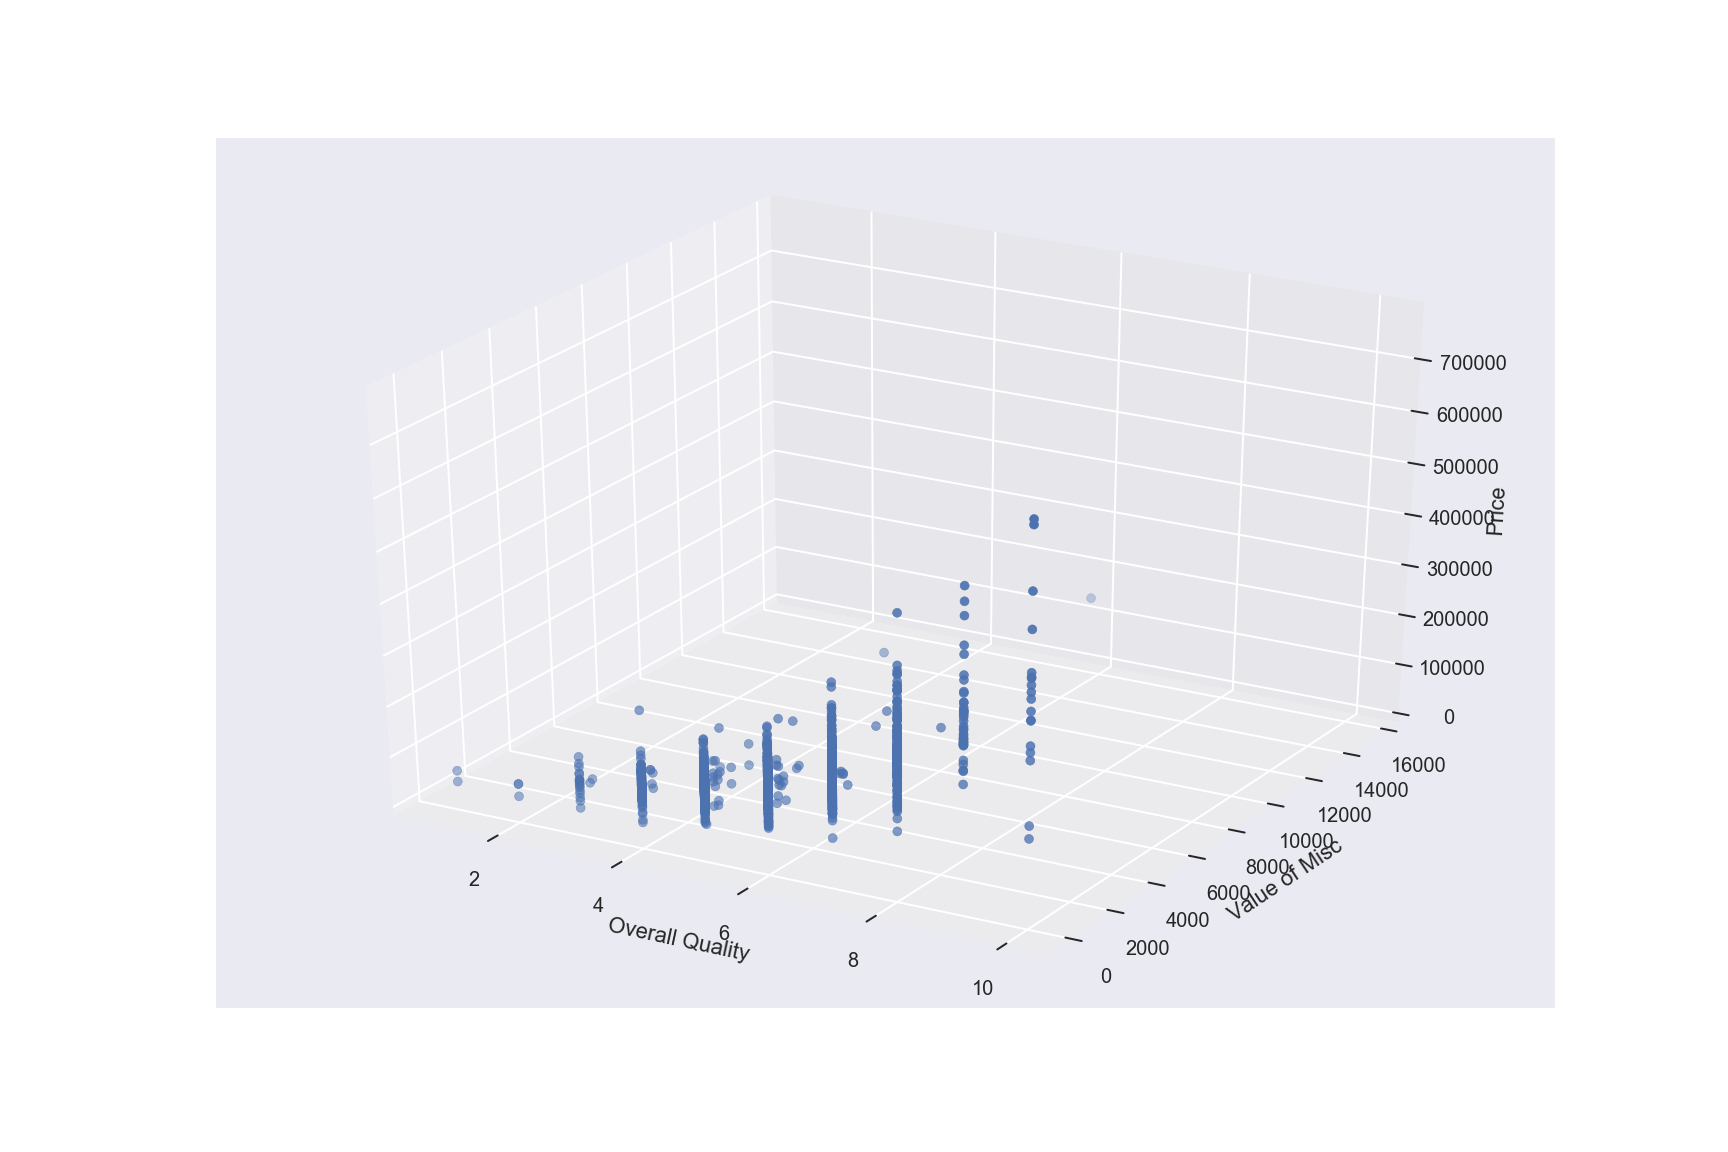

In [516]:
%matplotlib notebook
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X['OverallQual'], X['MiscVal'], y)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('Value of Misc')
ax.set_zlabel('Price')

### TODO
* Corrolelogramm
* Take care of year built!
* Carve out a clean benchmark model with the correct score (and corrected log function with nan-problems)
* Feature Engineering
    * Imputation http://scikit-learn.org/stable/modules/preprocessing.html#imputation
    * Removing outliers
    * Transform categorical variables
    * Normalization
    * Create new combined features
    * remove correlations
    * do i need to transform object variables explizitly in catgorical
* Analyze directions of model
* Drop Variables without big importances (Porch etc. see feature engineering)
* Enhance Model
    * Boosting
    * Forest
    * Lasso (Reqularization)
* Nan in scoring function is not tolerable i suppose!
* Handle < 0 predictions!
* Small muliples of correlations?

#### Notes

* Keep warnings in mind!
* What if we train it not with the RMSE but score it with this??
* greater is better=False
* testsize of 0.4 seems to work fine
* Baseline prediction (https://signal-to-noise.xyz/post/sklearn-pipeline/)
* PCA
* Combining PCA with KBest (http://scikit-learn.org/stable/auto_examples/plot_feature_stacker.html#sphx-glr-auto-examples-plot-feature-stacker-py)
* Pipelines

Select principal components and K-Best features:
http://scikit-learn.org/stable/auto_examples/plot_feature_stacker.html#sphx-glr-auto-examples-plot-feature-stacker-py